# Importação das bibliotecas

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Leitura do banco de dados

In [25]:
df = pd.read_csv("../data/df_fev2.csv")
df
#inches

,Unnamed: 0,age,fev,height,sex,smoke
0,0,9,1.953,68.0,masculino,sim
1,1,10,2.236,66.0,feminino,sim
2,3,13,2.216,68.0,feminino,sim
3,4,12,1.953,66.0,masculino,sim
4,5,10,2.198,62.0,feminino,sim
...,...,...,...,...,...,...
649,656,16,4.270,67.0,masculino,sim
650,657,15,3.727,68.0,masculino,sim
651,658,18,2.853,60.0,feminino,nao
652,659,16,2.795,63.0,feminino,sim


# Sem análise exploratória, queremos ver como FEV se relaciona com o fato de uma pessoa fumar

# Estatística descritiva do FEV em fumantes

In [26]:
df.groupby(['smoke'])['fev'].describe()

,count,mean,std,min,25%,50%,75%,max
smoke,,,,,,,,
nao,584.0,2.552296,0.825844,0.791,1.91975,2.463,3.03675,5.633
sim,70.0,3.158000,0.768263,1.694,2.60125,3.112,3.64575,4.872


A média dos não fumantes está dando menor!

## UÉ???!!

### Boxplot

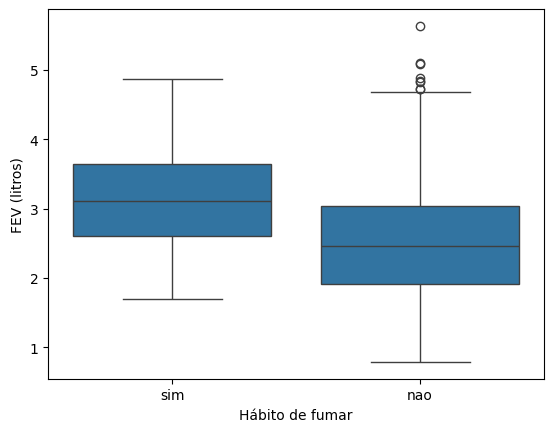

In [27]:
sns.boxplot(x = 'smoke', y = 'fev', data = df)
plt.xlabel('Hábito de fumar')
plt.ylabel('FEV (litros)')
plt.show()

# Regressão linear

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Criando variável dummy

Uma variável dummy é uma variável que assume valores de 0 ou 1 para indicar a presença ou ausência de alguma característica ou categoria. É uma forma de representar variáveis categóricas com duas ou mais categorias em um modelo de regressão.

In [29]:
df_copy = df.copy()

dummies = pd.get_dummies(df_copy['smoke']).rename(columns=lambda x: 'fuma_' + str(x))
df_copy = pd.concat([df_copy, dummies], axis=1)
df_copy

,Unnamed: 0,age,fev,height,sex,smoke,fuma_nao,fuma_sim
0,0,9,1.953,68.0,masculino,sim,False,True
1,1,10,2.236,66.0,feminino,sim,False,True
2,3,13,2.216,68.0,feminino,sim,False,True
3,4,12,1.953,66.0,masculino,sim,False,True
4,5,10,2.198,62.0,feminino,sim,False,True
...,...,...,...,...,...,...,...,...
649,656,16,4.270,67.0,masculino,sim,False,True
650,657,15,3.727,68.0,masculino,sim,False,True
651,658,18,2.853,60.0,feminino,nao,True,False
652,659,16,2.795,63.0,feminino,sim,False,True


In [30]:
mod1 = smf.ols(formula = 'fev ~ fuma_sim', data = df_copy)

In [31]:
res = mod1.fit()

In [32]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    fev   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     34.11
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           8.22e-09
Time:                        17:36:55   Log-Likelihood:                -797.15
No. Observations:                 654   AIC:                             1598.
Df Residuals:                     652   BIC:                             1607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.5523      0.034  

**Vamos focar aqui no coeficiente (smoke) e no P-valor**


*   P valor menor 0,05  - Nossa hipótese nula é rejetada, logo, a variável é de fato interessante para o modelo

*   Agora vamos olhar o coeficiente. Ele nos mostra que o FEV de quem fuma é em média 0.6057 maior de quem não fuma

* Nossa equação ficaria:
Fumante:

  *   Fumante: FEV = (2.5523+0.6057)
  *   Não fumante: FEV = (2.5523)
  *   Geral: FEV = (2.5523) + 0.6057*(habito de fumar)

## QUE????

# É nisso que dá não fazer uma análise exploratória antes!



# Mas, e a idade? - Variável confundidora

Crianças mais velhas tem um pulmão maior, e naturalmente tem capacidade pulmonar maior

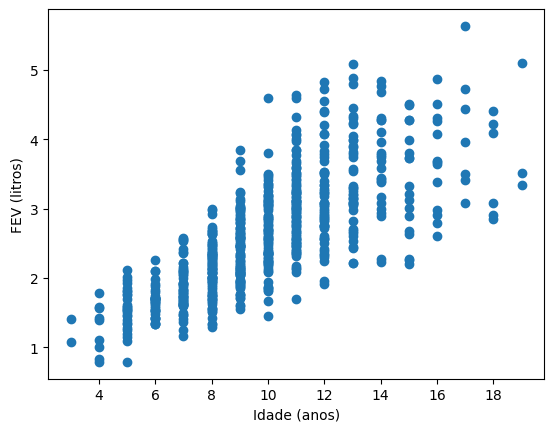

In [33]:
# Capacidade pulmonar x idade
plt.plot(df_copy.age, df_copy.fev, 'o')
plt.xlabel('Idade (anos)')
plt.ylabel('FEV (litros)')
plt.show()

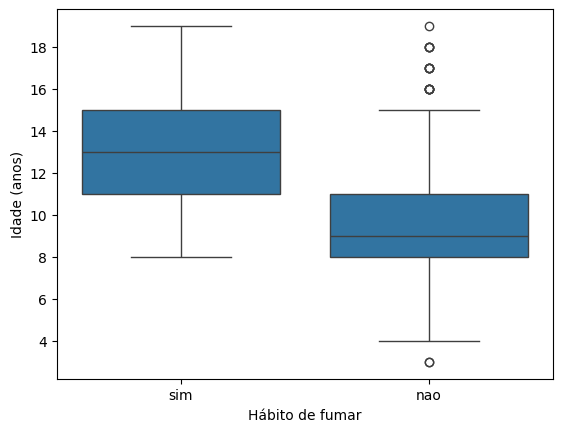

In [34]:
# Esses grupos não são comparáveis em relação a idade - crianças que fumam são mais velhas
sns.boxplot(x = 'smoke', y = 'age', data = df_copy)
plt.xlabel('Hábito de fumar')
plt.ylabel('Idade (anos)')
plt.show()

# Regressão linear incluindo a idade

Vamos adicionar a idade como uma variável

In [35]:
mod2 = smf.ols(formula = 'fev ~ fuma_sim + age', data = df_copy) #2 variáveis como previsora!

In [36]:
res2 = mod2.fit()

In [37]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                    fev   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     441.9
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          5.79e-122
Time:                        17:36:55   Log-Likelihood:                -533.38
No. Observations:                 654   AIC:                             1073.
Df Residuals:                     651   BIC:                             1086.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3986      0.079  


* P valor menor 0,05 - Nossa hipótese nula é rejeitada, logo, a variável é de fato interessante para o modelo

* Agora vamos olhar o coeficiente. Ele nos mostra que quem fuma tem um FEV 0.0.2450 MENOR do que quem não fuma




# Agora vamos fazer nossa regressão do zero

# 1) Objetivo: Entender se as variáveis são explicativas e prever o FEV

In [38]:
df_copy.columns

Index(['Unnamed: 0', 'age', 'fev', 'height', 'sex', 'smoke', 'fuma_nao',
       'fuma_sim'],
      dtype='object')

## Excluindo colunas inúteis

In [39]:
df_copy = df_copy.drop(columns =['Unnamed: 0']) #são ids, não nos ajudam a prever nada

## Análise exploratória

### Numéricas

#### Variável

In [40]:
df_copy.dtypes

age           int64
fev         float64
height      float64
sex          object
smoke        object
fuma_nao       bool
fuma_sim       bool
dtype: object

In [41]:
df_copy.select_dtypes(include= ["float64", "int64"]).describe()

,age,fev,height
count,654.000000,654.000000,654.000000
mean,9.905199,2.617127,61.113761
std,2.930048,0.840472,5.671440
min,3.000000,0.791000,46.000000
25%,8.000000,1.973000,57.000000
50%,10.000000,2.531000,61.500000
75%,12.000000,3.109500,65.475000
max,19.000000,5.633000,74.000000


#### Variável/features (x) x target (y)
x -> variável independente/feature/variável

y -> variável dependente/target

In [42]:
x = df_copy.select_dtypes(include= ["float64", "int64"]).columns
x

Index(['age', 'fev', 'height'], dtype='object')

C:\Users\vanes\AppData\Local\Temp\ipykernel_29056\1907489349.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


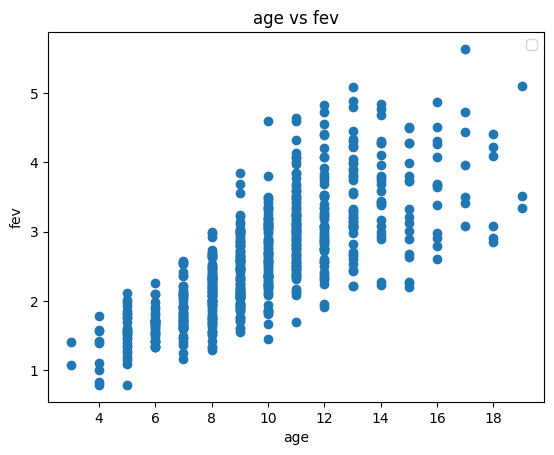

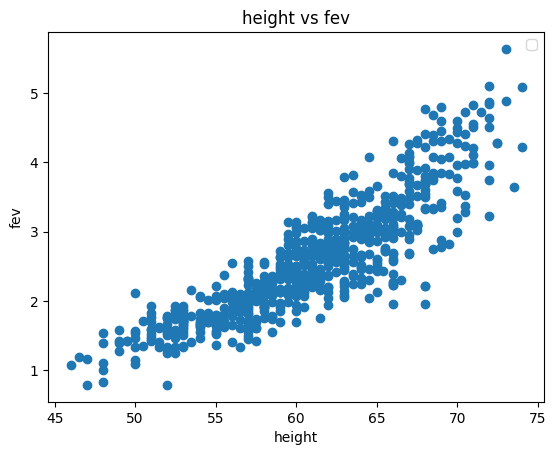

In [43]:
y = "fev"
x = df_copy.select_dtypes(include=["number"]).columns


for i in x:
  if i != y:
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df_copy[i], df_copy[y])
    ax.set_xlabel(i)
    ax.set_ylabel(y)
    ax.set_title("{} vs {}".format(i, y))

    plt.legend()
    plt.show()

#### Variável x Variável (multicolinearidade)

Multicolinearidade refere-se a uma situação em que duas ou mais variáveis independentes em um modelo de regressão linear estão altamente correlacionadas entre si. Isso significa que uma variável independente pode ser linearmente prevista a partir das outras com um grau de precisão substancial.

A presença de multicolinearidade pode causar vários problemas em um modelo de regressão:

- **Coeficientes instáveis**: Pequenas mudanças nos dados podem levar a grandes variações nos coeficientes estimados.
- **Difícil interpretação**: Fica difícil determinar o efeito individual de cada variável independente na variável dependente.
- **Aumento nos erros padrão**: Isso pode levar a testes estatísticos menos precisos, resultando em intervalos de confiança amplos e testes de significância não confiáveis.

Para detectar multicolinearidade, pode-se utilizar métricas como o Fator de Inflação da Variância (VIF). Um VIF alto (geralmente acima de 10) indica a presença de multicolinearidade.

Se a multicolinearidade for identificada, algumas abordagens para lidar com ela incluem:

- **Remover variáveis**: Excluir uma ou mais das variáveis altamente correlacionadas.
- **Combinar variáveis**: Criar uma nova variável que combina as variáveis correlacionadas.
- **Utilizar técnicas de regularização**: Métodos como regressão Ridge ou Lasso podem ajudar a mitigar os efeitos da multicolinearidade.

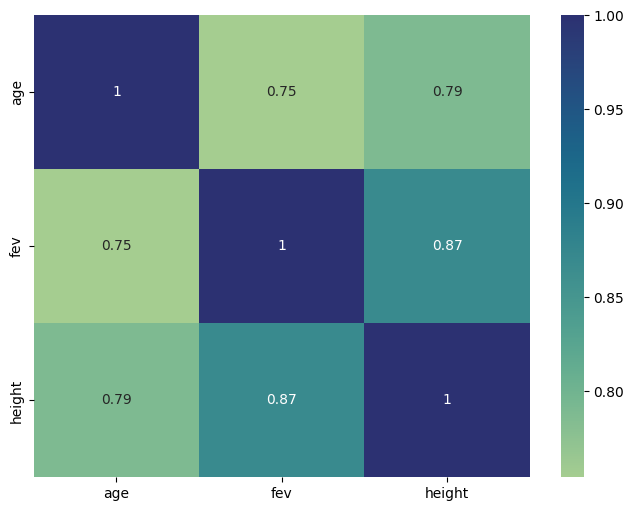

In [44]:
num = df_copy.select_dtypes(include= ["float64", "int64"])

plt.figure(figsize=(8, 6))
sns.heatmap(num.corr(), annot=True, cmap="crest")
plt.show()

Ponto de atenção! Notem como "Height" é bastante correlacionado com "Age". Temos um ponto aqui que pode gerar multicolinearidade.

Essa correlação não é perfeita, então ainda pode agregar ao nosso modelo. Porém, é interessante estudarmos o efeito de ambas juntas no modelo e o efeito de uma delas apenas.

Quando chegarmos no ponto de escolhermos qual delas é melhor, podemos escolher pela maior correlação.

### Categóricas

In [45]:
df_copy.select_dtypes(include= ["object"])

,sex,smoke
0,masculino,sim
1,feminino,sim
2,feminino,sim
3,masculino,sim
4,feminino,sim
...,...,...
649,masculino,sim
650,masculino,sim
651,feminino,nao
652,feminino,sim


In [46]:
df_copy["sex"].value_counts()
#cardinalidade

sex
masculino    335
feminino     319
Name: count, dtype: int64

In [47]:
df_copy["smoke"].value_counts()

smoke
nao    584
sim     70
Name: count, dtype: int64

C:\Users\vanes\AppData\Local\Temp\ipykernel_29056\842809187.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


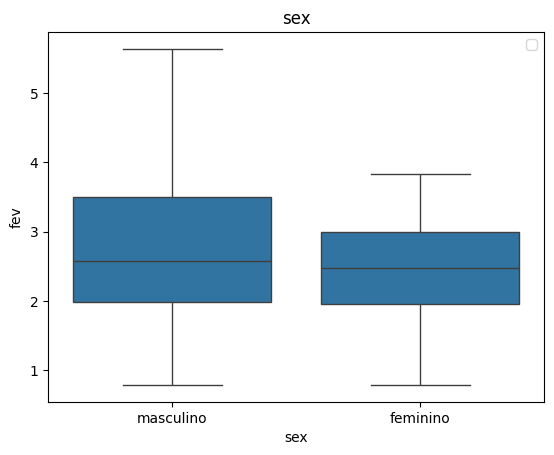

C:\Users\vanes\AppData\Local\Temp\ipykernel_29056\842809187.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


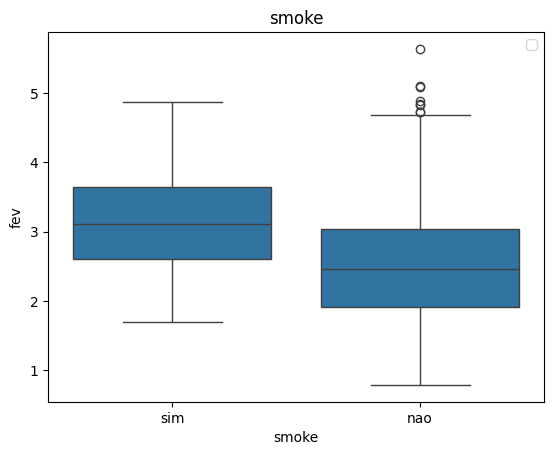

In [48]:
y = 'fev'
x = df_copy.select_dtypes(include= ["object"]).columns


for i in x:
    figure = plt.figure
    ax = plt.gca()
    sns.boxplot(x=i, y='fev', data=df_copy)
    ax.set_xlabel(i)
    ax.set_ylabel(y)
    ax.set_title("{}".format(i))

    plt.legend()
    plt.show()

## Categóricas com numéricas

C:\Users\vanes\AppData\Local\Temp\ipykernel_29056\2048807355.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


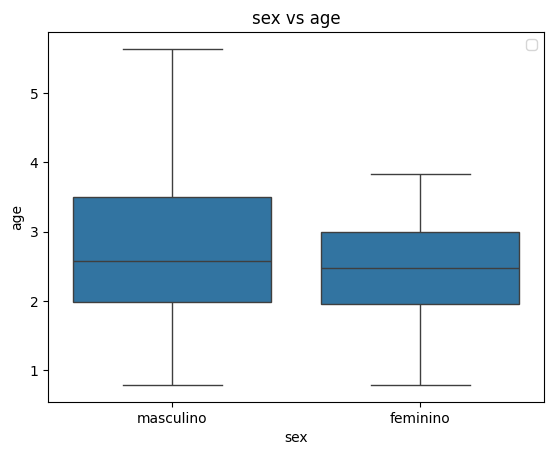

C:\Users\vanes\AppData\Local\Temp\ipykernel_29056\2048807355.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


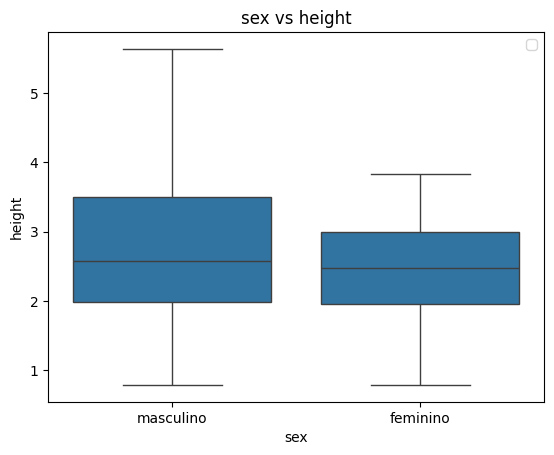

C:\Users\vanes\AppData\Local\Temp\ipykernel_29056\2048807355.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


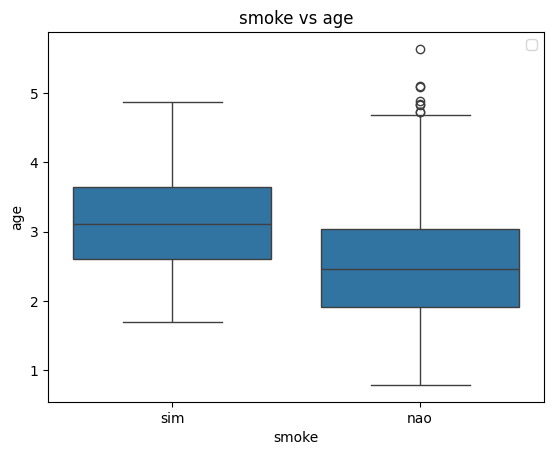

C:\Users\vanes\AppData\Local\Temp\ipykernel_29056\2048807355.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


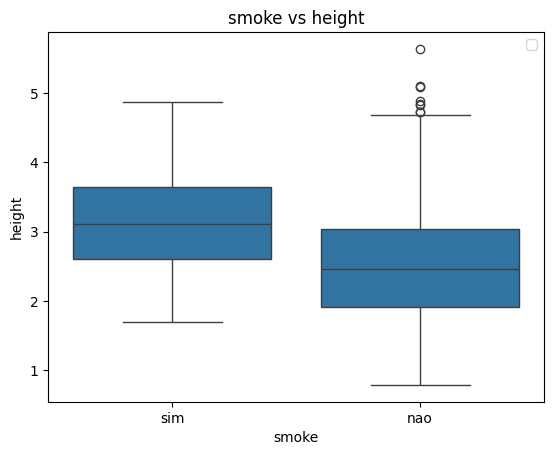

In [49]:
y = df_copy.select_dtypes(include= ["float64", "int64"]).columns
x = df_copy.select_dtypes(include= ["object"]).columns


for i in x:
  for item in y:
    if item != "fev":
      figure = plt.figure
      ax = plt.gca()
      sns.boxplot(x=i, y='fev', data=df_copy)
      ax.set_xlabel(i)
      ax.set_ylabel(item)
      ax.set_title("{} vs {}".format(i, item))

      plt.legend()
      plt.show()

# Pressupostos para regressão


Precisamos ainda fazer a variável dummy de sexo (smoke já fizemos antes)

In [50]:

dummies = pd.get_dummies(df_copy['sex'], drop_first=True).rename(columns=lambda x: 'genero_' + str(x))
df_copy = pd.concat([df_copy, dummies], axis=1)
df_copy

,age,fev,height,sex,smoke,fuma_nao,fuma_sim,genero_masculino
0,9,1.953,68.0,masculino,sim,False,True,True
1,10,2.236,66.0,feminino,sim,False,True,False
2,13,2.216,68.0,feminino,sim,False,True,False
3,12,1.953,66.0,masculino,sim,False,True,True
4,10,2.198,62.0,feminino,sim,False,True,False
...,...,...,...,...,...,...,...,...
649,16,4.270,67.0,masculino,sim,False,True,True
650,15,3.727,68.0,masculino,sim,False,True,True
651,18,2.853,60.0,feminino,nao,True,False,False
652,16,2.795,63.0,feminino,sim,False,True,False


# 1)Linearidade
Já checamos linearidade acima.

No contexto da regressão linear, linearidade refere-se à suposição de que existe uma relação linear entre as variáveis independentes (ou preditoras) e a variável dependente (ou resposta). Isso significa que a mudança na variável dependente pode ser explicada por mudanças proporcionais nas variáveis independentes. Em outras palavras, se representarmos a relação em um gráfico, a variável dependente pode ser expressa como uma soma de termos que são produtos de constantes (coeficientes) e as variáveis independentes, formando uma linha reta. Esta suposição é fundamental para a validade do modelo de regressão linear.

# 2) Multicolinearidade

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_copy = df_copy.dropna()

# Converter colunas booleanas para inteiros
df_copy['fuma_sim'] = df_copy['fuma_sim'].astype(int)
df_copy['genero_masculino'] = df_copy['genero_masculino'].astype(int)

X = df_copy[['fuma_sim', 'age', 'height', 'genero_masculino']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


           Variable        VIF
0          fuma_sim   1.335442
1               age  24.150954
2            height  24.515331
3  genero_masculino   2.127308


Não devemos usar age e heighr juntos. Podemos escolher 1 delas apenas

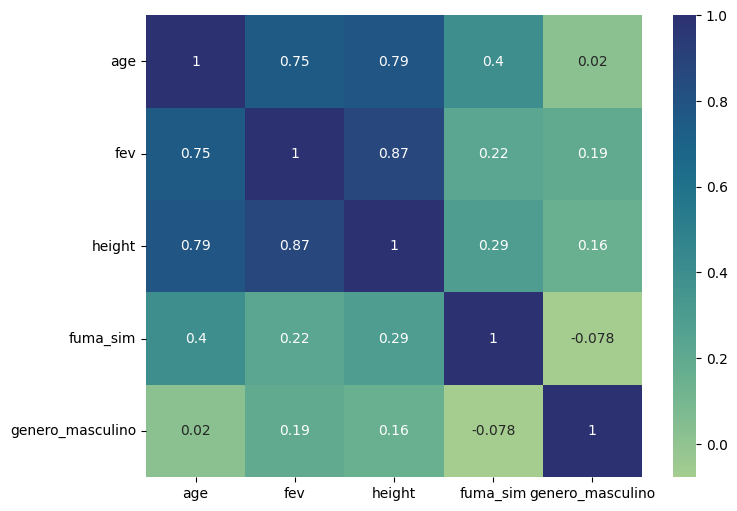

In [52]:
# Filtrar apenas colunas dos tipos inteiro e float
cols_num = df_copy.select_dtypes(include=['int', 'float'])
corr = cols_num.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="crest")
plt.show()

Vamos escolher a que tem a maior correlação com fev. Nesse caso, é height

Agora precisamos fitar o modelo para analisar os resíduos

In [53]:
mod3 = smf.ols(formula = 'fev ~ fuma_sim + height + genero_masculino', data = df_copy) #2 variáveis como previsora!
res = mod3.fit()

# 2) Homocedasticidade
# 5) O termo de erro tem uma média populacional de zero

No contexto da regressão linear, esses conceitos se referem a suposições fundamentais sobre os resíduos (ou termos de erro) do modelo:

- **Homocedasticidade**:
   Homocedasticidade significa que a variância dos erros (ou resíduos) é constante para todos os valores das variáveis independentes. Em outras palavras, a dispersão dos resíduos não deve aumentar ou diminuir sistematicamente com o nível das variáveis independentes. Essa suposição garante que o modelo de regressão linear seja eficiente e que as inferências estatísticas feitas com base nele sejam válidas.

- **O termo de erro tem uma média populacional de zero**:
   Esta suposição indica que os erros (ou resíduos) do modelo, em média, devem ser zero. Em outras palavras, se somarmos todos os erros do modelo, o resultado deve ser zero, indicando que o modelo não está sistematicamente subestimando ou superestimando a variável dependente. Isso assegura que os coeficientes estimados do modelo não sejam tendenciosos.

[Text(0.5, 0, 'Fitted'), Text(0, 0.5, 'Residuals')]

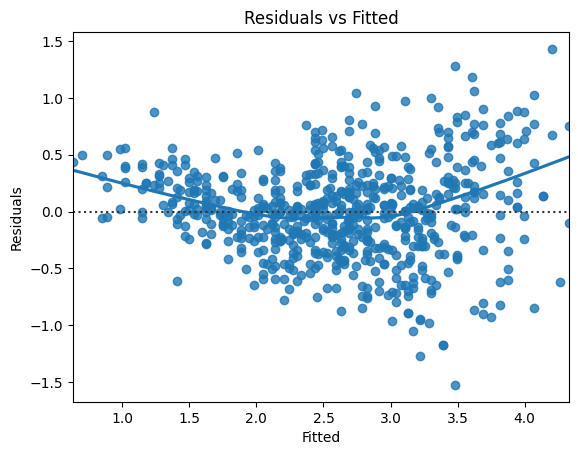

In [54]:
y = df_copy["fev"]
fig, ax = plt.subplots(1, 1)

sns.residplot(x=res.fittedvalues, y=res.resid, lowess=True) #lowess mostra a linha azul em torno da pontilhada
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted', ylabel='Residuals')

Notem como quase forma-se um triangulo. O critério de homecedasticidade parece estar sendo violado!

A heterocedasticidade ocorre com mais frequência em conjuntos de dados que possuem um grande intervalo entre o maior e o menor valor observado.

Uma forma de corrigir o problema é usar transformações na variável dependente (log, box-cox, etc). Essa é a que vamos usar aqui

Outra maneira de corrigir a heterocedasticidade é redefinir a variável dependente. Uma maneira comum de fazer isso é usar uma taxa para a variável dependente, em vez do valor bruto.

Por exemplo, em vez de usar o tamanho da população para prever o número de floriculturas em uma cidade, podemos usar o tamanho da população para prever o número de floriculturas per capita.

Na maioria dos casos, isso reduz a variabilidade que ocorre naturalmente entre populações maiores, pois estamos medindo o número de floriculturas por pessoa, em vez da grande quantidade de floriculturas.

# Transformações de base

https://www.youtube.com/watch?v=5YkMbnrNOgo

https://brasilescola.uol.com.br/matematica/logaritmo.htm

https://www.infoescola.com/matematica/logaritmo-natural/#:~:text=O%20n%C3%BAmero%20e,-O%20n%C3%BAmero%20e&text=Seu%20nome%20ficou%20ligado%20para,71%2C%20ou%20na%20base%20e.

## Aplicando log na variável dependente

In [55]:
df_copy['log_fev'] = np.log(df_copy['fev'])


mod4 = smf.ols(formula = 'log_fev ~ fuma_sim + height +genero_masculino', data = df_copy) #2 variáveis como previsora!
res = mod4.fit()

[Text(0.5, 0, 'Fitted'), Text(0, 0.5, 'Residuals')]

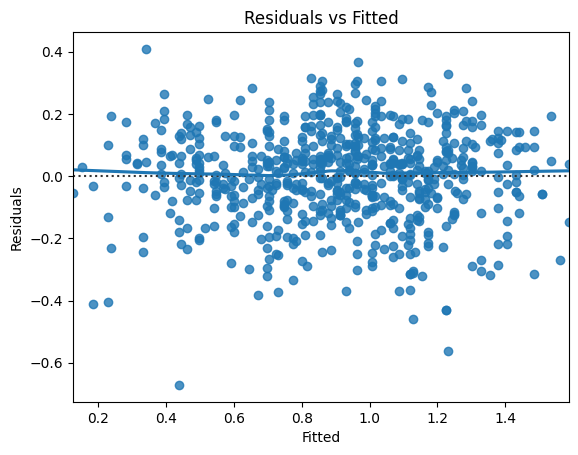

In [56]:

fig, ax = plt.subplots(1, 1)

sns.residplot(x=res.fittedvalues, y=res.resid,  lowess=True)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted', ylabel='Residuals')

In [57]:
res.resid.mean()

np.float64(-1.5970914702864638e-15)

# 3) Resíduo versus variável independente
Temos apenas 1 numérica (height).

No contexto da regressão linear, a suposição de exogeneidade significa que os resíduos (ou termos de erro) não estão correlacionados com as variáveis independentes. Em outras palavras, qualquer erro na predição da variável dependente não deve estar relacionado às variáveis independentes utilizadas no modelo. Essa suposição é crucial porque, se houver correlação entre os resíduos e as variáveis independentes, os coeficientes estimados podem ser tendenciosos, comprometendo a validade do modelo.

Se a exogeneidade for violada, isso indica que há alguma variável omitida ou um problema de especificação do modelo que precisa ser corrigido para que as estimativas do modelo sejam confiáveis e válidas para previsões e inferências.



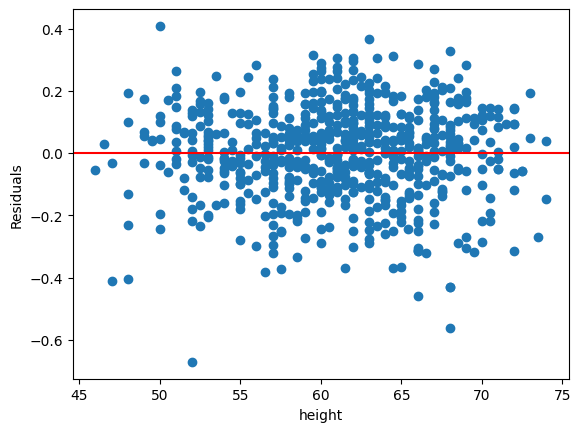

In [58]:
df_resid = df_copy.copy()
df_resid["residuo"] = res.resid


plt.scatter(df_resid["height"], df_resid["residuo"])
plt.axhline(0, color='red')
plt.xlabel('height');
plt.ylabel('Residuals');

# 4) Autocorrelação do resíduo

A autocorrelação de resíduos refere-se à correlação entre os resíduos (ou erros) de diferentes observações no modelo de regressão. Em um modelo de regressão linear, assume-se que os resíduos são independentes entre si, ou seja, a correlação entre os resíduos de diferentes observações deve ser zero.

Quando há autocorrelação, os resíduos de uma observação podem estar correlacionados com os resíduos de outras observações, indicando que o modelo não capturou alguma estrutura subjacente nos dados. A autocorrelação é especialmente comum em dados de séries temporais, onde os valores de uma variável em um ponto no tempo podem estar correlacionados com os valores em pontos anteriores.

A presença de autocorrelação nos resíduos pode levar a erros padrão subestimados ou superestimados, comprometendo a validade dos testes de hipóteses e a precisão das previsões do modelo. Para detectar a autocorrelação, pode-se usar testes como o teste de Durbin-Watson. Se a autocorrelação for detectada, técnicas como a inclusão de termos de defasagem (lagged terms) ou a modelagem de erros correlacionados podem ser aplicadas para corrigir o problema.

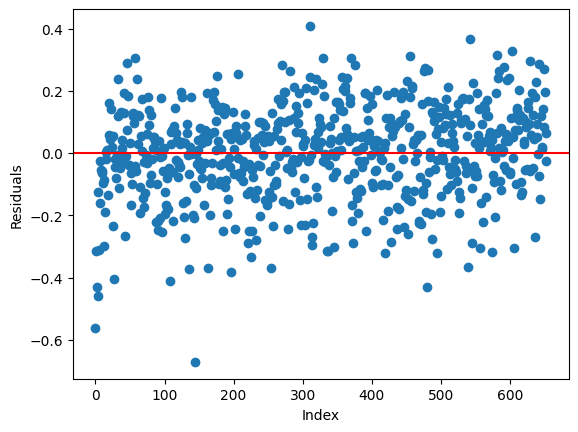

In [59]:
df_auto = res.resid.reset_index().rename(columns={0: "resid"})

plt.scatter(df_auto["index"] , df_auto["resid"])
plt.axhline(0, color='red')
plt.xlabel('Index');
plt.ylabel('Residuals');

In [60]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(res.resid)

np.float64(1.5058234108849031)

# 7) Resíduos tem distribuição normal

No contexto da regressão linear, assume-se que os resíduos (ou termos de erro) seguem uma distribuição normal. Esta suposição é importante por várias razões:

Validade dos testes de hipóteses: Muitos testes estatísticos, como os testes t e F, assumem que os resíduos são normalmente distribuídos. A normalidade dos resíduos garante que as inferências sobre os coeficientes do modelo (tais como intervalos de confiança e testes de significância) sejam válidas.
Previsão precisa: A normalidade dos resíduos ajuda a garantir que as previsões e os intervalos de previsão do modelo sejam precisos e confiáveis.
Para verificar se os resíduos seguem uma distribuição normal, pode-se utilizar:

Gráficos de probabilidade normal (Q-Q plots): Um gráfico Q-Q compara a distribuição dos resíduos com uma distribuição normal. Se os resíduos forem normalmente distribuídos, os pontos no gráfico Q-Q formarão aproximadamente uma linha reta.
Testes estatísticos: Testes como o teste de Shapiro-Wilk ou o teste de Kolmogorov-Smirnov podem ser usados para testar a hipótese de normalidade dos resíduos.
Se os resíduos não forem normalmente distribuídos, isso pode indicar que o modelo não está adequadamente especificado ou que há a presença de outliers ou outras anomalias nos dados. Em tais casos, pode ser necessário transformar as variáveis, remover outliers ou utilizar métodos de modelagem robustos que não assumam normalidade dos resíduos.

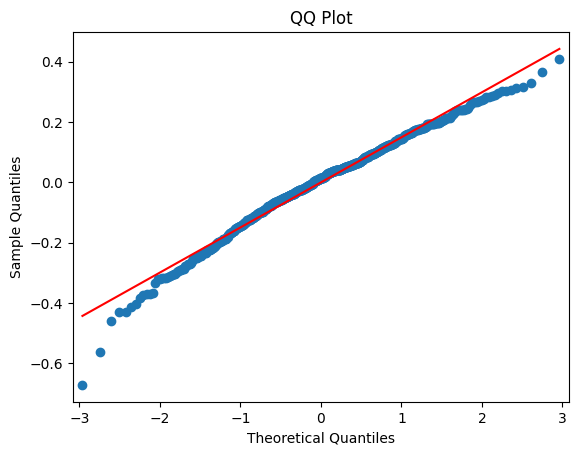

In [61]:

fig, ax = plt.subplots(1, 1)
sm.ProbPlot(res.resid).qqplot(line='s', ax=ax)
ax.title.set_text('QQ Plot')

(array([  1.,   2.,   9.,  33.,  70., 152., 201., 127.,  51.,   8.]),
 array([-0.67120208, -0.56321923, -0.45523637, -0.34725352, -0.23927066,
        -0.13128781, -0.02330495,  0.0846779 ,  0.19266076,  0.30064361,
         0.40862647]),
 <BarContainer object of 10 artists>)

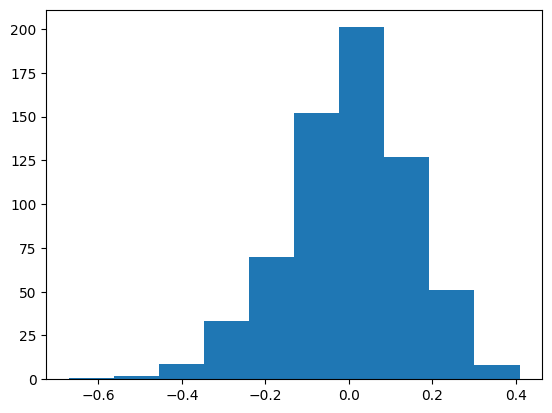

In [62]:
plt.hist(res.resid)

In [63]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                log_fev   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     825.9
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          3.22e-221
Time:                        17:36:57   Log-Likelihood:                 315.49
No. Observations:                 654   AIC:                            -623.0
Df Residuals:                     650   BIC:                            -605.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.2672      0.066  

* Adj. R-squared: 0.791 (alto)
* Quem fuma: FEV 0.04390 menor do que quem não fuma
* Altura: quanto maior, maior o FEV
* Genereo masculino: FEV 0.0077 maior do que genero feminino -> porém p-valor não é significativo (diferença não é significativa)

In [64]:
mod6 = smf.ols(formula = 'log_fev ~ fuma_sim + height', data = df_copy) #2 variáveis como previsora!
res6 = mod6.fit()
print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:                log_fev   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1240.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          9.93e-223
Time:                        17:36:57   Log-Likelihood:                 315.28
No. Observations:                 654   AIC:                            -624.6
Df Residuals:                     651   BIC:                            -611.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2712      0.066    -34.546      0.0

log(FEV) =   -2.2712 - 0.0455  * fuma_sim + 0.0521 * height

**Criança não fumante 67 inches de altura**

log(FEV) = -2.2712 + 0.0521 * 67 = 1.2195

FEV = e^1.2195 = 2.7182^1.2195 = 3.3855

**Criança fumante 67 inches de altura**

log(FEV) = -2.2712 -0.0455 * 1 + 0.0521 * 67 = 1.174

FEV = e^1.174 = 2.7182^1.174 = 3.23491

In [65]:
df_copy[['height', 'fuma_sim', 'fev']].sample(n=10).to_csv("fev_predict.csv")
df_predict = pd.read_csv("fev_predict.csv")

In [66]:
X = df_predict[['height','fuma_sim']]
log_fev = res6.predict(X)
log_fev

0    0.491777
1    1.273750
2    1.065224
3    0.804566
4    1.117355
5    1.221618
6    1.325881
7    0.706890
8    0.778500
9    0.863285
dtype: float64

In [67]:
from math import e
fev = e**log_fev
fev

0    1.635219
1    3.574231
2    2.901488
3    2.235726
4    3.056759
5    3.392674
6    3.765503
7    2.027676
8    2.178203
9    2.370937
dtype: float64

In [68]:
df_predict["predicted_fev"] = fev
df_predict

,Unnamed: 0,height,fuma_sim,fev,predicted_fev
0,86,53.0,0,1.695,1.635219
1,550,68.0,0,3.329,3.574231
2,178,64.0,0,3.004,2.901488
3,421,59.0,0,2.491,2.235726
4,331,65.0,0,3.654,3.056759
5,628,67.0,0,3.731,3.392674
6,606,69.0,0,2.785,3.765503
7,195,58.0,1,1.953,2.027676
8,181,58.5,0,2.091,2.178203
9,591,61.0,1,3.120,2.370937


# Avaliando a variável mais importante

Para fazer isso, precisamos fazer o scaling das variáveis

In [70]:
from sklearn.preprocessing import StandardScaler

X = df_copy[['height', 'fuma_sim']]

# Inicializar o scaler
scaler = StandardScaler()

# fitar o modelo de scaler
X_transf = scaler.fit_transform(X)

df_transform = pd.DataFrame(X_transf, columns = X.columns)

# juntar com o fev
df_transform["log_fev"] = df_copy["log_fev"]

In [71]:
df_transform

,height,fuma_sim,log_fev
0,1.215125,2.888400,0.669367
1,0.862211,2.888400,0.804689
2,1.215125,2.888400,0.795704
3,0.862211,2.888400,0.669367
4,0.156383,2.888400,0.787548
...,...,...,...
649,1.038668,2.888400,1.451614
650,1.215125,2.888400,1.315604
651,-0.196531,-0.346212,1.048371
652,0.332840,2.888400,1.027832


In [72]:
mod5 = smf.ols(formula = 'log_fev ~ fuma_sim + height', data = df_transform)
res5 = mod5.fit()

[Text(0.5, 0, 'Fitted'), Text(0, 0.5, 'Residuals')]

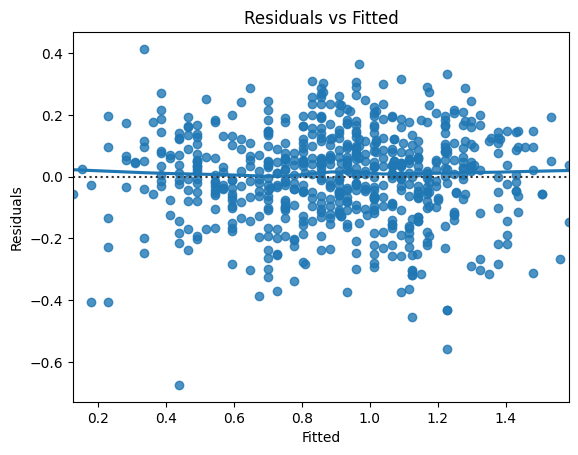

In [73]:
y = df_transform["log_fev"]
fig, ax = plt.subplots(1, 1)

sns.residplot(x=res5.fittedvalues, y=res5.resid, lowess=True) #lowess mostra a linha azul em torno da pontilhada
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted', ylabel='Residuals')

In [74]:
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:                log_fev   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1240.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          9.93e-223
Time:                        17:40:18   Log-Likelihood:                 315.28
No. Observations:                 654   AIC:                            -624.6
Df Residuals:                     651   BIC:                            -611.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9099      0.006    155.374      0.0

# Sumário

#### Verificação de Premissas da Regressão Linear

1. **Verificar a linearidade entre variáveis independentes e dependente:**
   ```python
   import seaborn as sns
   import matplotlib.pyplot as plt

   sns.pairplot(df, x_vars=['Publicidade'], y_vars='Vendas', height=5, aspect=1, kind='reg')
   plt.show()
   ```

2. **Verificar a homocedasticidade dos resíduos:**
   ```python
   import statsmodels.api as sm

   model = sm.OLS(df['Vendas'], sm.add_constant(df['Publicidade'])).fit()
   residuals = model.resid
   fitted = model.fittedvalues

   plt.scatter(fitted, residuals)
   plt.axhline(y=0, color='r', linestyle='--')
   plt.xlabel('Valores Ajustados')
   plt.ylabel('Resíduos')
   plt.show()
   ```

3. **Verificar exogeneidade (resíduos versus variável independente):**
   ```python
   plt.scatter(df['Publicidade'], residuals)
   plt.axhline(y=0, color='r', linestyle='--')
   plt.xlabel('Publicidade')
   plt.ylabel('Resíduos')
   plt.show()
   ```

4. **Verificar autocorrelação dos resíduos:**
   ```python
   from statsmodels.stats.stattools import durbin_watson

   dw_statistic = durbin_watson(residuals)
   print(f'Estatística de Durbin-Watson: {dw_statistic}')
   ```

5. **Verificar a multicolinearidade:**
   ```python
   from statsmodels.stats.outliers_influence import variance_inflation_factor

   X = sm.add_constant(df['Publicidade'])
   vif = pd.DataFrame()
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   vif["Variable"] = X.columns
   print(vif)
   ```

6. **Verificar se os resíduos têm distribuição normal:**
   ```python
   sm.qqplot(residuals, line='45')
   plt.show()

   from scipy.stats import shapiro

   shapiro_test = shapiro(residuals)
   print(f'Teste de Shapiro-Wilk: {shapiro_test}')
   ```